In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
data=pd.read_csv("annotated_points_np_200.csv")
data

,x,y,labels
0,5.846774,13.397557,1.0
1,6.028226,11.992811,1.0
2,5.423387,12.323339,1.0
3,5.221774,14.182562,1.0
4,5.826613,14.554406,1.0
...,...,...,...
195,13.245968,12.819132,3.0
196,12.883065,12.364655,3.0
197,12.721774,11.827547,3.0
198,12.500000,11.827547,3.0


In [168]:
data=np.array(data)
data

array([[ 5.84677419, 13.39755684,  1.        ],
       [ 6.02822581, 11.99281101,  1.        ],
       [ 5.4233871 , 12.32333944,  1.        ],
       [ 5.22177419, 14.18256187,  1.        ],
       [ 5.8266129 , 14.55440636,  1.        ],
       [ 6.59274194, 14.76098663,  1.        ],
       [ 6.53225806, 13.81071738,  1.        ],
       [ 6.61290323, 12.73649998,  1.        ],
       [ 7.0766129 , 13.89334949,  1.        ],
       [ 7.27822581, 12.9017642 ,  1.        ],
       [ 7.21774194, 15.09151506,  1.        ],
       [ 7.74193548, 13.93466555,  1.        ],
       [ 7.60080645, 14.80230268,  1.        ],
       [ 4.69758065, 13.35624079,  1.        ],
       [ 5.28225806, 13.19097657,  1.        ],
       [ 4.83870968, 12.57123576,  1.        ],
       [ 4.97983871, 11.74491468,  1.        ],
       [ 5.4233871 , 11.00122571,  1.        ],
       [ 5.625     , 10.21622068,  1.        ],
       [ 5.76612903, 16.70284117,  1.        ],
       [ 5.78629032, 15.95915219,  1.   

In [169]:
data[data==3]=-1
data

array([[ 5.84677419, 13.39755684,  1.        ],
       [ 6.02822581, 11.99281101,  1.        ],
       [ 5.4233871 , 12.32333944,  1.        ],
       [ 5.22177419, 14.18256187,  1.        ],
       [ 5.8266129 , 14.55440636,  1.        ],
       [ 6.59274194, 14.76098663,  1.        ],
       [ 6.53225806, 13.81071738,  1.        ],
       [ 6.61290323, 12.73649998,  1.        ],
       [ 7.0766129 , 13.89334949,  1.        ],
       [ 7.27822581, 12.9017642 ,  1.        ],
       [ 7.21774194, 15.09151506,  1.        ],
       [ 7.74193548, 13.93466555,  1.        ],
       [ 7.60080645, 14.80230268,  1.        ],
       [ 4.69758065, 13.35624079,  1.        ],
       [ 5.28225806, 13.19097657,  1.        ],
       [ 4.83870968, 12.57123576,  1.        ],
       [ 4.97983871, 11.74491468,  1.        ],
       [ 5.4233871 , 11.00122571,  1.        ],
       [ 5.625     , 10.21622068,  1.        ],
       [ 5.76612903, 16.70284117,  1.        ],
       [ 5.78629032, 15.95915219,  1.   

In [170]:
def perceptron(x):
    D=x[:,0:2]
    y=x[:,2]
    a=int(input("Enter 0 for random initialization,1 for values from Dataset and anything for Zero initialization"))
    if a==0:
        lower_bound = 0
        upper_bound = 14
        W=np.array([0]*D.shape[1])
        W[0],W[1]=np.random.randint(lower_bound, upper_bound + 1),np.random.randint(lower_bound, upper_bound + 1)
        b= np.random.randint(lower_bound, upper_bound + 1)  # upper_bound + 1 to include upper_bound itself
    elif a==1:
        num=np.random.randint(100)
        W=np.array([0]*D.shape[1])
        W[0]=D[num][0]
        W[1]=D[num][1]
        b=y[num]
    else:
        W=np.array([0]*D.shape[1])
        b=0
    print("Initial W",W)
    print("Initial b",b)

    while True:
        m=0
        for i in range(D.shape[0]):
            if y[i]*(np.dot(W,D[i])+b)<=0:
                W=W+y[i]*D[i]
                b=b+y[i]
                m=m+1
        if m==0:
            break
    return b,W

In [171]:
def plot_line(X,coefficients):
    # Extract coefficients for x, y, and the constant term
    a, b, c = coefficients

    # Generate x values
    x_values = np.linspace(min(X), max(X), 100)

    # Calculate corresponding y values using the equation of the line
    y_values = -( b * x_values + a) /c
    plt.scatter(data[:, 0], data[:, 1], c=data[:,2], cmap='viridis')
    # Plot the line
    plt.plot(x_values, y_values, label=f'{a}x + {b}y + {c} = 0')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of the Line')

    # Add a grid for better readability
    plt.grid(True)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

# Random Initialization of Parameters W and b #

In [172]:
b,W=perceptron(data)
print(b,W)

Initial W [2 2]
Initial b 10
813.0 [-237.375       102.96858603]


In [173]:
W=np.insert(W,0,b)

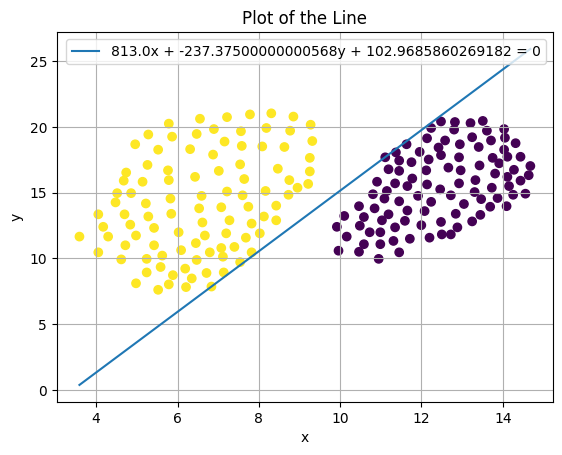

In [174]:
plot_line(data[:,0],W)

# Initialization of W and b from values in Dataset #

In [175]:
b,W=perceptron(data)
print(b,W)

Initial W [ 4 18]
Initial b 1.0
809.0 [-235.83870968  102.16741265]


In [176]:
W=np.insert(W,0,b)

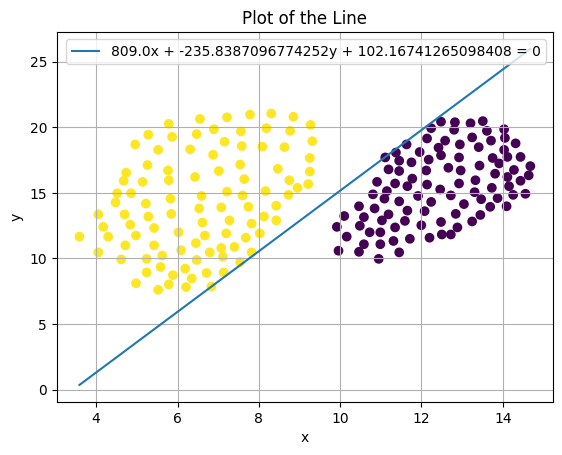

In [177]:
plot_line(data[:,0],W)

# Zero Initialization #

In [179]:
b,W=perceptron(data)
print(b,W)

Initial W [0 0]
Initial b 0
811.0 [-236.53225806  102.54520665]


In [180]:
W=np.insert(W,0,b)

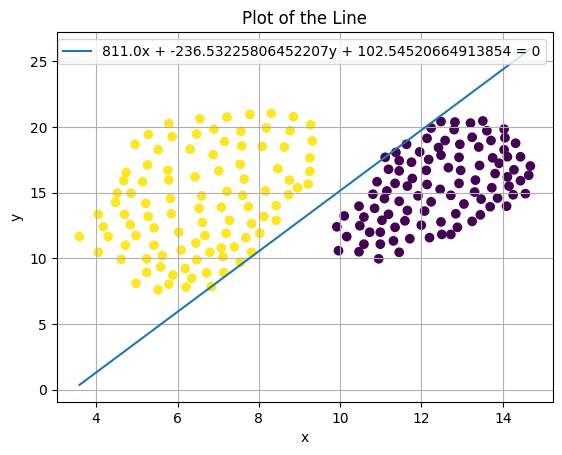

In [181]:
plot_line(data[:,0],W)